In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gmaps
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
buyer_seller = "BuyerSellerIndexCleaned.csv" 
buyer_seller_df = pd.read_csv("BuyerSellerIndexCleaned.csv")
buyer_seller_us = "BuyerSellerIndexUSAclean.csv"
buyer_seller_us_df = pd.read_csv("BuyerSellerIndexUSAclean.csv")
buyer_seller_ga = "buyer_seller_ga.csv"
buyer_seller_ga_df = pd.read_csv("buyer_seller_ga.csv")
buyer_seller_county = "buyer_seller_county.csv"
buyer_seller_county_df = pd.read_csv("buyer_seller_county.csv")

In [34]:
buyer_seller_us_df["PercentChange"] = 0.0
buyer_seller_us_df["InitialValue"] = 0.0
buyer_seller_us_df["FinalValue"] = 0.0
buyer_seller_us_df["MonthCount"] = 0.0

for index, row in buyer_seller_us_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 1
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = str(month)
        else:
            month_str = str(month)
        if not np.isnan(buyer_seller_us_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = buyer_seller_us_df.loc[index, year_str + '-' + month_str]
            buyer_seller_us_df["InitialValue"][index] = (InitialValue)
            month_count+=1
        if month == 11 and year == 2019:
            buyer_seller_us_df["FinalValue"][index] = buyer_seller_us_df.loc[index, year_str + '-' + month_str] 
            buyer_seller_us_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

# buyer_seller_us_df["Percent Change"] = (buyer_seller_us_df["FinalValue"] - buyer_seller_us_df["InitialValue"]) / buyer_seller_us_df["InitialValue"]  * 100


C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


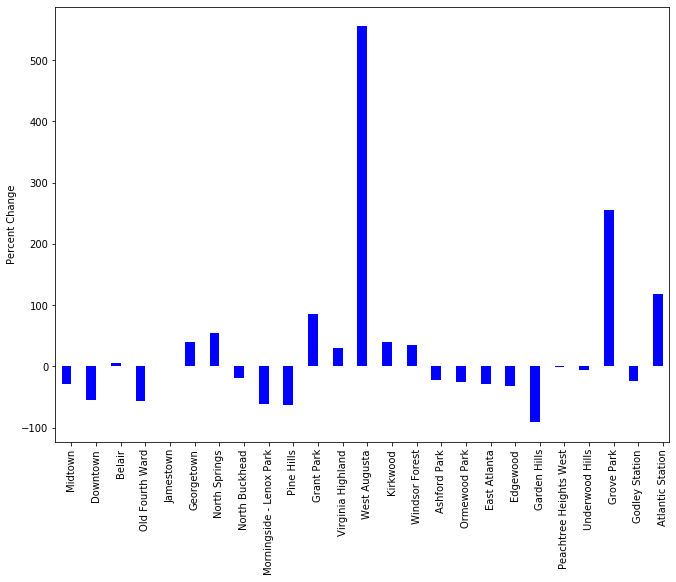

0     -27.884615
1     -54.309450
2       6.044678
3     -56.701031
4       1.239157
5      40.242057
6      55.241935
7     -18.151815
8     -61.592179
9     -63.127690
10     86.138614
11     29.455446
12    555.102041
13     40.437158
14     35.013624
15    -22.897196
16    -25.939850
17    -28.199052
18    -32.026144
19    -90.292553
20     -1.650165
21     -6.338028
22    255.737705
23    -23.707865
24    118.652850
Name: Percent Change, dtype: float64


In [35]:
buyer_seller_df["PercentChange"] = 0.0
buyer_seller_df["InitialValue"] = 0.0
buyer_seller_df["FinalValue"] = 0.0
buyer_seller_df["MonthCount"] = 0.0

for index, row in buyer_seller_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 1
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = str(month)
        else:
            month_str = str(month)
        if not np.isnan(buyer_seller_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = buyer_seller_df.loc[index, year_str + '-' + month_str]
            buyer_seller_df["InitialValue"][index] = float(InitialValue)
            month_count+=1
        if month == 11 and year == 2019:
            buyer_seller_df["FinalValue"][index] = buyer_seller_df.loc[index, year_str + '-' + month_str] 
            buyer_seller_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

buyer_seller_df["Percent Change"] = (buyer_seller_df["FinalValue"] - buyer_seller_df["InitialValue"]) / buyer_seller_df["InitialValue"]  * 100


fig = plt.figure()
fig.set_size_inches(11,8)
ax = fig.add_subplot()
width = 0.4
x_axis = buyer_seller_df["Region"]
buyer_seller_df["Percent Change"].plot(kind='bar', color='blue', ax=ax, width=width, position=1)
ax.set_xticklabels(x_axis)
ax.set_ylabel('Percent Change')

plt.show()

print(buyer_seller_df["Percent Change"])


In [36]:
buyer_seller_df

,Region,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,2015-9,...,2019-7,2019-8,2019-9,2019-10,2019-11,PercentChange,InitialValue,FinalValue,MonthCount,Percent Change
0,Midtown,6.24,7.52,7.71,8.35,7.80,8.17,7.89,7.61,7.25,...,4.40,4.04,3.94,4.22,4.50,0.0,6.24,4.50,59.0,-27.884615
1,Downtown,9.63,9.45,4.95,3.21,2.66,4.86,5.50,2.84,2.11,...,4.50,3.67,3.49,3.85,4.40,0.0,9.63,4.40,59.0,-54.309450
2,Belair,7.61,7.16,6.61,6.51,6.33,6.42,5.41,5.23,5.32,...,10.00,9.72,9.45,8.99,8.07,0.0,7.61,8.07,59.0,6.044678
3,Old Fourth Ward,6.79,5.05,4.86,4.50,3.67,3.30,3.49,4.68,4.77,...,6.06,4.31,3.39,3.03,2.94,0.0,6.79,2.94,59.0,-56.701031
4,Jamestown,8.07,7.61,6.06,4.86,3.12,3.76,4.22,5.96,6.97,...,8.35,8.53,9.17,8.81,8.17,0.0,8.07,8.17,59.0,1.239157
5,Georgetown,6.61,7.34,7.61,6.88,6.42,6.51,6.97,7.43,7.71,...,9.36,8.90,8.17,8.99,9.27,0.0,6.61,9.27,59.0,40.242057
6,North Springs,2.48,4.22,5.96,6.42,6.06,4.68,4.50,3.39,3.67,...,8.44,7.71,5.78,5.41,3.85,0.0,2.48,3.85,59.0,55.241935
7,North Buckhead,3.03,3.39,2.84,2.94,3.49,4.86,7.52,8.17,8.26,...,5.87,4.04,2.66,2.29,2.48,0.0,3.03,2.48,59.0,-18.151815
8,Morningside - Lenox Park,7.16,6.51,6.79,7.52,8.44,8.81,8.90,7.98,6.70,...,7.80,6.61,4.13,2.84,2.75,0.0,7.16,2.75,59.0,-61.592179
9,Pine Hills,6.97,5.14,4.68,5.32,8.17,9.36,9.17,7.71,6.70,...,6.24,5.50,5.05,3.49,2.57,0.0,6.97,2.57,59.0,-63.127690


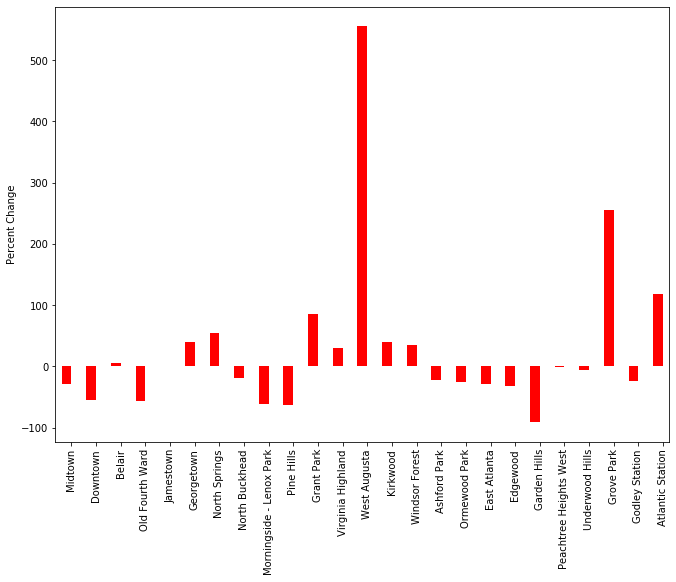

In [37]:
fig = plt.figure()
fig.set_size_inches(11,8)
ax = fig.add_subplot()
width = 0.4
x_axis = buyer_seller_df["Region"]
buyer_seller_df["Percent Change"].plot(kind='bar', color='red', ax=ax, width=width, position=1)
ax.set_xticklabels(x_axis)
ax.set_ylabel('Percent Change')

plt.show()

In [ ]:
buyer_seller_df.sort_values(by='Percent Change', ascending=False)

In [77]:
buyer_seller_us_df.sort_values(by='Percent Change', ascending=False).head(50)

,RegionName,StateName,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,...,2019-7,2019-8,2019-9,2019-10,2019-11,PercentChange,InitialValue,FinalValue,MonthCount,Percent Change
144,"Huntington, WV",WV,0.09,0.92,5.96,7.52,6.97,6.51,6.42,6.61,...,7.80,6.79,7.16,7.71,9.17,0.0,0.09,9.17,59.0,10088.888889
593,"Rolla, MO",MO,0.18,0.28,0.55,0.83,1.19,4.68,6.33,8.17,...,8.44,8.90,9.08,9.27,9.36,0.0,0.18,9.36,59.0,5100.000000
691,"Toccoa, GA",GA,0.18,0.09,0.46,2.84,5.78,6.33,4.59,3.58,...,9.72,8.99,8.53,8.44,9.08,0.0,0.18,9.08,59.0,4944.444444
540,"Rochelle, IL",IL,0.28,0.55,1.19,3.30,4.40,5.23,5.14,5.32,...,9.17,8.72,8.53,7.89,8.44,0.0,0.28,8.44,59.0,2914.285714
615,"Alexander City, AL",AL,0.37,0.46,0.55,1.19,1.56,2.20,4.22,6.42,...,8.26,8.35,8.81,8.90,8.07,0.0,0.37,8.07,59.0,2081.081081
520,"Sterling, IL",IL,0.46,3.12,4.59,4.77,2.20,2.66,3.67,4.31,...,8.17,9.08,9.63,9.72,9.82,0.0,0.46,9.82,59.0,2034.782609
686,"Breckenridge, CO",CO,0.37,0.18,0.09,0.28,0.64,6.15,4.95,5.32,...,7.98,8.26,8.07,7.80,7.43,0.0,0.37,7.43,59.0,1908.108108
423,"Midland, MI",MI,0.55,0.92,1.28,1.10,1.01,1.56,1.93,2.48,...,10.00,9.91,9.82,9.36,9.08,0.0,0.55,9.08,59.0,1550.909091
235,"Joplin, MO",MO,0.55,1.28,1.47,1.19,1.01,0.64,1.83,3.85,...,10.00,9.91,9.72,9.36,8.90,0.0,0.55,8.90,59.0,1518.181818
704,"Craig, CO",CO,0.55,0.28,0.37,1.10,1.74,1.93,3.39,5.96,...,8.26,8.44,8.53,8.81,8.72,0.0,0.55,8.72,59.0,1485.454545


In [38]:
buyer_seller_us_df.head(20)

,RegionName,StateName,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,...,2019-6,2019-7,2019-8,2019-9,2019-10,2019-11,PercentChange,InitialValue,FinalValue,MonthCount
0,United States,NaN,3.76,4.04,4.22,4.50,4.86,5.78,5.69,5.60,...,7.89,8.17,8.35,8.53,8.72,8.90,0.0,3.76,8.90,59.0
1,"New York, NY",NY,6.15,6.33,6.42,5.96,5.05,4.50,4.04,4.22,...,8.35,7.98,7.89,7.80,8.07,8.17,0.0,6.15,8.17,59.0
2,"Los Angeles-Long Beach-Anaheim, CA",CA,3.39,3.67,3.76,3.85,4.50,5.23,5.96,6.15,...,2.94,3.49,4.13,4.31,4.68,5.32,0.0,3.39,5.32,59.0
3,"Chicago, IL",IL,4.13,3.94,3.58,3.39,3.21,2.94,2.75,3.12,...,7.89,8.17,8.07,7.80,7.71,7.61,0.0,4.13,7.61,59.0
4,"Dallas-Fort Worth, TX",TX,7.25,8.07,9.27,9.63,9.72,10.00,9.91,9.82,...,3.12,3.30,3.58,3.39,3.03,2.84,0.0,7.25,2.84,59.0
5,"Philadelphia, PA",PA,3.49,3.21,3.30,3.03,2.84,2.94,3.39,3.76,...,9.45,9.63,9.72,9.82,9.91,10.00,0.0,3.49,10.00,59.0
6,"Houston, TX",TX,9.63,9.72,9.91,10.00,9.82,9.36,8.53,8.07,...,2.84,3.21,3.39,3.30,2.94,2.66,0.0,9.63,2.66,59.0
7,"Washington, DC",DC,3.85,3.58,3.30,2.94,2.75,2.84,3.12,3.39,...,9.82,9.63,9.72,9.54,9.91,10.00,0.0,3.85,10.00,59.0
8,"Miami-Fort Lauderdale, FL",FL,0.92,1.01,1.38,2.02,3.58,7.16,9.36,9.72,...,4.04,4.31,5.41,6.15,6.88,6.97,0.0,0.92,6.97,59.0
9,"Atlanta, GA",GA,4.22,4.40,5.23,5.87,6.15,6.24,5.96,5.78,...,7.71,7.52,7.43,7.34,7.80,8.07,0.0,4.22,8.07,59.0


In [39]:
buyer_seller_ga_df["PercentChange"] = 0.0
buyer_seller_ga_df["InitialValue"] = 0.0
buyer_seller_ga_df["FinalValue"] = 0.0
buyer_seller_ga_df["MonthCount"] = 0.0

for index, row in buyer_seller_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 1
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = str(month)
        else:
            month_str = str(month)
        if not np.isnan(buyer_seller_ga_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = buyer_seller_ga_df.loc[index, year_str + '-' + month_str]
            buyer_seller_ga_df["InitialValue"][index] = float(InitialValue)
            month_count+=1
        if month == 11 and year == 2019:
            buyer_seller_ga_df["FinalValue"][index] = buyer_seller_ga_df.loc[index, year_str + '-' + month_str] 
            buyer_seller_ga_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

buyer_seller_ga_df["Percent Change"] = (buyer_seller_ga_df["FinalValue"] - buyer_seller_ga_df["InitialValue"]) / buyer_seller_ga_df["InitialValue"]  * 100


C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
buyer_seller_ga_df.sort_values(by='Percent Change', ascending=False)

,RegionName,StateName,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,...,2019-7,2019-8,2019-9,2019-10,2019-11,PercentChange,InitialValue,FinalValue,MonthCount,Percent Change
10,"Dalton, GA",GA,1.65,1.47,1.38,1.74,2.57,5.32,5.14,4.13,...,8.99,8.72,9.08,8.62,8.81,0.0,1.65,8.81,59.0,433.939394
6,"Athens, GA",GA,2.20,2.57,3.21,4.95,5.78,6.24,6.15,5.69,...,8.35,8.17,8.07,8.53,8.99,0.0,2.20,8.99,59.0,308.636364
20,"Milledgeville, GA",GA,2.02,0.92,1.01,0.73,1.38,1.28,1.65,1.19,...,2.11,2.57,4.40,6.06,8.17,0.0,2.02,8.17,59.0,304.455446
11,"Valdosta, GA",GA,2.48,0.92,0.46,0.55,1.10,1.93,3.39,4.40,...,9.36,9.45,9.72,9.54,9.17,0.0,2.48,9.17,59.0,269.758065
7,"Gainesville, GA",GA,2.48,2.20,2.39,3.94,5.14,5.87,6.97,6.88,...,8.72,8.44,8.62,8.35,8.07,0.0,2.48,8.07,59.0,225.403226
16,"LaGrange, GA",GA,3.12,3.03,2.94,2.57,2.84,3.58,4.68,4.95,...,8.17,7.89,7.61,7.98,8.53,0.0,3.12,8.53,59.0,173.397436
18,"Dublin, GA",GA,2.57,3.49,2.94,4.04,4.31,5.41,5.14,6.24,...,8.35,8.26,7.89,7.25,6.61,0.0,2.57,6.61,59.0,157.198444
13,"Rome, GA",GA,3.58,2.20,1.74,1.93,4.22,6.06,5.50,3.39,...,10.00,9.91,9.54,9.08,8.90,0.0,3.58,8.90,59.0,148.603352
22,"St. Marys, GA",GA,3.76,3.67,3.58,5.96,8.26,9.54,8.99,8.53,...,8.62,8.90,8.81,9.17,9.27,0.0,3.76,9.27,59.0,146.542553
19,"Calhoun, GA",GA,3.30,1.47,1.19,1.56,3.12,5.50,5.32,4.40,...,8.26,7.25,7.80,7.52,7.98,0.0,3.30,7.98,59.0,141.818182


C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\isaac\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TypeError: can only concatenate str (not "int") to str

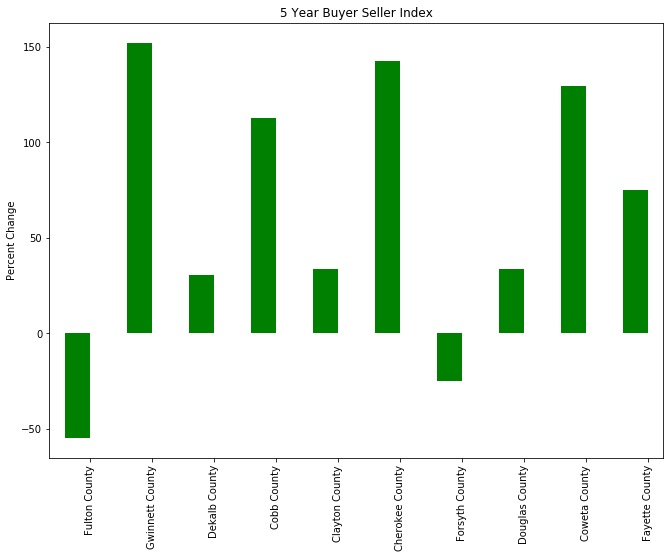

In [42]:
buyer_seller_county_df["PercentChange"] = 0.0
buyer_seller_county_df["InitialValue"] = 0.0
buyer_seller_county_df["FinalValue"] = 0.0
buyer_seller_county_df["MonthCount"] = 0.0

for index, row in buyer_seller_county_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 1
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = str(month)
        else:
            month_str = str(month)
        if not np.isnan(buyer_seller_county_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = buyer_seller_county_df.loc[index, year_str + '-' + month_str]
            buyer_seller_county_df["InitialValue"][index] = float(InitialValue)
            month_count+=1
        if month == 11 and year == 2019:
            buyer_seller_county_df["FinalValue"][index] = buyer_seller_county_df.loc[index, year_str + '-' + month_str] 
            buyer_seller_county_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

buyer_seller_county_df["Percent Change"] = (buyer_seller_county_df["FinalValue"] - buyer_seller_county_df["InitialValue"]) / buyer_seller_county_df["InitialValue"]  * 100







fig = plt.figure()
fig.set_size_inches(11,8)
ax = fig.add_subplot()
width = 0.4
x_axis = buyer_seller_county_df["RegionName"]
buyer_seller_county_df["Percent Change"].plot(kind='bar', color='green', ax=ax, width=width, position=1)
ax.set_xticklabels(x_axis)
ax.set_ylabel('Percent Change')

plt.title('5 Year Buyer Seller Index')
#plt.xlabel('x')
#plt.ylabel('y')



for i, v in enumerate('Percent Change'):
    ax.text(v + 3, i + .25, 
            str(v), color='blue', fontweight='bold')

plt.show()

In [84]:
buyer_seller_county_df.sort_values(by='Percent Change', ascending=False).head(5

,RegionName,MSA,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,...,2019-7,2019-8,2019-9,2019-10,2019-11,PercentChange,InitialValue,FinalValue,MonthCount,Percent Change
18,Pickens County,Atlanta-Sandy Springs-Roswell,0.73,0.64,1.19,2.29,4.04,5.60,4.40,3.85,...,5.41,6.51,6.88,7.34,6.97,0.0,0.73,6.97,59.0,854.794521
19,Butts County,Atlanta-Sandy Springs-Roswell,1.10,2.48,3.67,4.86,3.94,3.49,2.84,3.03,...,8.07,9.36,9.91,9.54,8.81,0.0,1.10,8.81,59.0,700.909091
20,Dawson County,Atlanta-Sandy Springs-Roswell,1.47,1.19,0.92,1.01,1.56,2.48,3.76,4.68,...,9.36,9.08,8.72,7.98,7.80,0.0,1.47,7.80,59.0,430.612245
21,Meriwether County,Atlanta-Sandy Springs-Roswell,2.20,1.10,3.58,6.51,8.90,8.81,8.26,6.42,...,10.00,9.82,9.54,9.45,9.17,0.0,2.20,9.17,59.0,316.818182
1,Gwinnett County,Atlanta-Sandy Springs-Roswell,2.84,3.12,3.03,3.30,3.67,4.59,5.50,5.60,...,7.71,7.61,7.52,7.34,7.16,0.0,2.84,7.16,59.0,152.112676
